In [84]:
from matplotlib import pyplot as plt
import numpy as np
import time
import sys
import pandas as pd
import seaborn as sns

sys.path.append("../PycharmProjects/pythonProject")
import NetworkClass
from imp import reload
reload(NetworkClass)
from NetworkClass import Network

# Weakly Connected

In [2]:
#two clusters 5x5 that are weakly connected 

length = 60000 #one minute in millisecond

dim = (1,5,5)
input_num = 10
Clusters = 2
dt = 0.05

V_syn={(1, 1): 60, (1, 0): -70, (0, 1): 60, (0, 0): -70} # Synapses stregnth (EE,EI,IE,II)
connect_const = {(1, 1): 0.9, (1, 0): 0.2, (0, 1): 0.4,(0, 0): 0.1} #(EE,EI,IE,II)
cluster_pr_weak = 0.1 # Connection probability between neurons in cluster 1 and 2 

net_weak = Network(dim=dim,model='SFA',clusters=2,lamb=2.2,inh_frac=0.2,dt=dt,R=0.2,tau=40,Vreset=5,Vr=-70,Vth=-40,alpha=0.05,tauN=80,gk=20,Vk=-88,J=4,tauRise=.8,tauDec=5.8,V_syn=V_syn,tau_psc=(6,3),connect_const=connect_const, input_num=input_num,cluster_pr=cluster_pr_weak)

In [3]:
net_weak.plot_network()

### Spiketrain Input

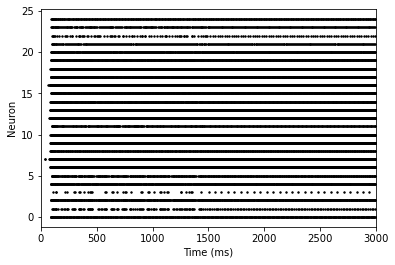

In [4]:
#Raster for weakly connected network - Spike Train with input_num = 10
input_spikes = net_weak.generate_spiketrain(length*dt,dt,20/1000,input_num,False,t_start=0,t_end=length//2)
net_weak.run_model(input_spikes, input_type = 1)
net_weak.plot_spikes()

Comments : We don't see the second cluster beacuse it hasn't been activated at all.

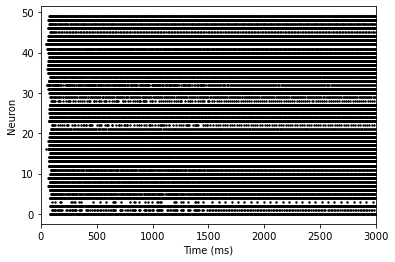

In [5]:
#Raster for weakly connected network - Spike Train with input_num = 20
input_spikes = net_weak.generate_spiketrain(length*dt,dt,20/1000,20,False,t_start=0,t_end=length//2)
net_weak.run_model(input_spikes, input_type = 1)
net_weak.plot_spikes()

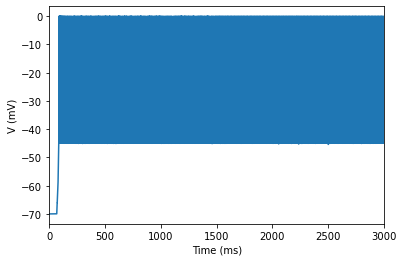

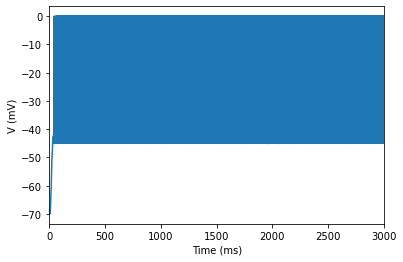

In [6]:
#plot one neuron - weak connection with input_num = 20
rand_neuron_c1 = int(np.random.randint(net_weak.neuron_num/2, size=1))
rand_neuron_c2 = int(np.random.randint(net_weak.neuron_num/2, size=1)) + int(net_weak.neuron_num/2)
net_weak.plot_neuron(rand_neuron_c1)
net_weak.plot_neuron(rand_neuron_c2)

### Current Input

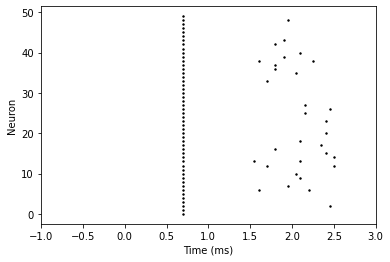

In [7]:
#Raster for weakly connected network - Current input with weak input_num

I = np.zeros(net_weak.neuron_num)
I[0:13] = 10000 #we activate only the first cluster
net_weak.run_model(I, input_type = 0)
net_weak.plot_spikes()

**Comment** : In the case where we input current only on the first cluster - If we activate less than 15 (+/-) neurons at the beginning (aka input_num) then we don't have activity in the network. However if we pass the kind of threshold then we see that all neurons spike at the same time exactly.

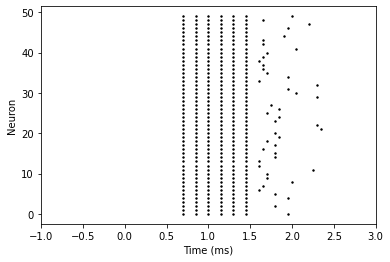

In [8]:
#Raster for weakly connected network - Current input with high input_num

I = np.zeros(net_weak.neuron_num)
I[0:30] = 10000 #we activate only the first cluster
net_weak.run_model(I, input_type = 0)
net_weak.plot_spikes()

**Comment** : In the case where we input current in both cluster - We obtain that all neurons spike together several times.

# Highly Connected

In [85]:
#two cluster 5x5 that are higly connected 

length = 60000 #one minute in milisecond

dim = (1,5,5)
input_num = 10
Clusters = 2
dt = 0.05


V_syn={(1, 1): 60, (1, 0): -70, (0, 1): 60, (0, 0): -70} # Synapses stregnth (EE,EI,IE,II)
connect_const = {(1, 1): 0.9, (1, 0): 0.2, (0, 1): 0.4,(0, 0): 0.1} #(EE,EI,IE,II)
cluster_pr_high = 0.9 # Connection probability between neurons in cluster 1 and 2 

net_high = Network(dim=dim,model='SFA',clusters=2,lamb=2.2,inh_frac=0.2,dt=dt,R=0.2,tau=40,Vreset=5,Vr=-70,Vth=-40,alpha=0.05,tauN=80,gk=20,Vk=-88,J=4,tauRise=.8,tauDec=5.8,V_syn=V_syn,tau_psc=(6,3),connect_const=connect_const, input_num=input_num,cluster_pr=cluster_pr_high)

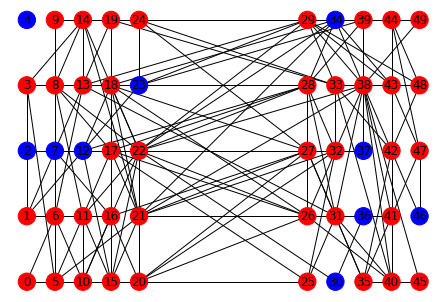

In [10]:
net_high.plot_net()

### Spiketrain Input

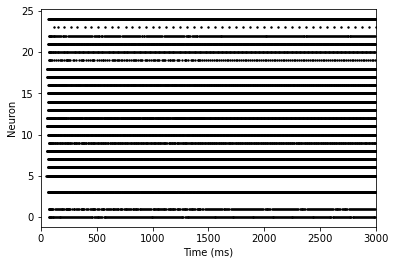

In [11]:
#Raster for highly connected network - Spike Train with input_num = 10
input_spikes = net_high.generate_spiketrain(length*dt,dt,20/1000,input_num,False,t_start=0,t_end=length//2)
net_high.run_model(input_spikes, input_type = 1)
net_high.plot_spikes()

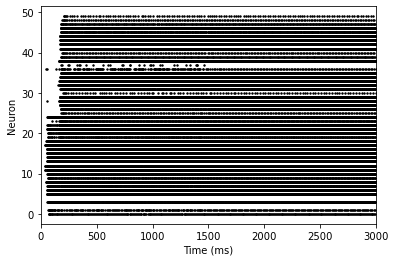

In [12]:
#Raster for highly connected network - Spike Train with input_num = 20
input_spikes = net_high.generate_spiketrain(length*dt,dt,20/1000,20,False,t_start=0,t_end=length//2)
net_high.run_model(input_spikes, input_type = 1)
net_high.plot_spikes()

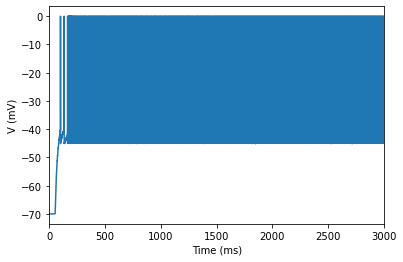

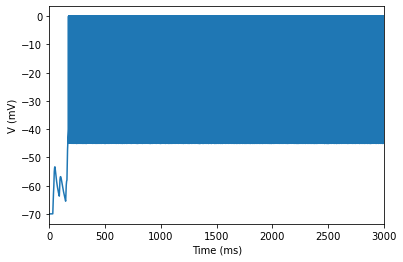

In [13]:
#plot one neuron - high connection with input_num = 20
rand_neuron_c1 = int(np.random.randint(net_high.neuron_num/2, size=1))
rand_neuron_c2 = int(np.random.randint(net_high.neuron_num/2, size=1)) + int(net_high.neuron_num/2)
net_high.plot_neuron(rand_neuron_c1)
net_high.plot_neuron(rand_neuron_c2)

### Current Input

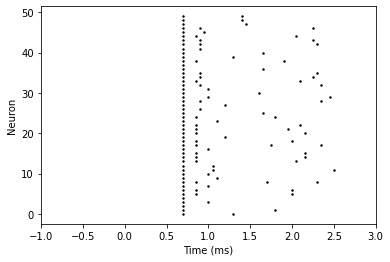

In [14]:
#Raster for highly connected network 

I = np.zeros(net_high.neuron_num)
I[0:15] = 10000 #we activate only the first cluster
net_high.run_model(I, input_type = 0)
net_high.plot_spikes()

**Comment** : In the case where we input current only on the first cluster - If we activate less than 15 (+/-) neurons at the beginning (aka input_num) then we don't have activity in the network. However if we pass the kind of threshold then we see that all neurons spike at the same time exactly.

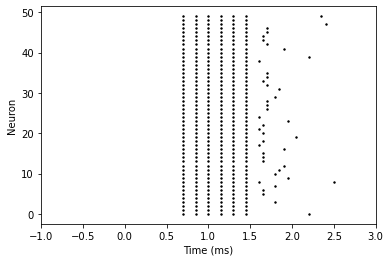

In [15]:
#Raster for highly connected network 

I = np.zeros(net_high.neuron_num)
I[0:30] = 10000 #we activate both clusters
net_high.run_model(I, input_type = 0)
net_high.plot_spikes()

**Comment** : In the case where we input current in both cluster - We obtain that all neurons spike together several times.

# Stuff that I saw

###### WEAK INPUT_NUM :
- For spiketrain input then we need to pass a certain threshold to activate the second cluster no matter the level of connection between the clusters.
- Something similar append when the input is current injection : we also need to pass a certain threshold to activate the network. however, when the threshold is passed, here both clusters are activated simultaneously.

###### HIGH INPUT_NUM :
- For spiketrain input with **weak** connection between clusters, when we pass the threshold we can see that there is an interval of time for the second cluster to be activated. After this interval of times, both clusters are acting in the same way. However when both clusters are **highly** connected, both clusters aren't acting in the same way. We saw that cluster one spike constantly in the contrary of cluster two that spike alternately.
- For current input, putting an high input_num make the all network spike together several times.

# Mark's comment and questions :

23.04.22 : New notebook that shows simulation for two clusters with different levels of connection between them.

24.04.22 : add a net function plot_net 
I did add a distance from the clusters however, it appears only in the plot, doesn't seems to have signification for the simulation, where to continue?



# To Do List

- Add probability between cluster decays exponentially with space constant
- understand why when input is current injection the neurons spikes together
- read the paper of koch, buzsaki on lfp
- volume conductance theory that link potential in the space with zerem transmembrane
- put an electrode outside the network and calculate lfp

# LFP

11.05.2022 :Calculation of the LFP with an electrode in each of our neurons (array of electrode kinda)

- need to check why times is linked to the number of neuron
- need to check if the heat respect the morfology of the neural network - OK
- need to change heatmap with the times

### Weak Connectivity

In [81]:
rows = np.arange(0,net_weak.dim[2])
cols = np.arange(0,net_weak.dim[1])

#times = np.arange(15000,35000,10)
times = np.arange(0,200,10)
phis = np.zeros((rows.shape[0]*cols.shape[0],times.shape[0]))

count=0
for i in rows:
    for j in cols:
        #print(j+i*20)
        z, x, y = net_weak.get_pos(j+i*5)
        r = net_weak.get_r(x, y)
        phis[count,:] = net_weak.get_phi(net_weak.EPSC_seq,r,times,0.003,net_weak.dim)
        count+=1

IndexError: index 60 is out of bounds for axis 0 with size 51

<AxesSubplot:>

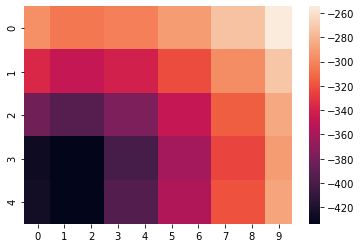

In [76]:
sns.heatmap(np.flip(phis[:,4].reshape(10,5),1).T)

### High Connectivity

In [86]:
rows = np.arange(0,net_high.dim[2])
cols = np.arange(0,net_high.dim[1])

times = np.arange(0,200,10)
#times = np.arange(0,40,10)
phis = np.zeros((rows.shape[0]*cols.shape[0],times.shape[0]))

count=0
for i in rows:
    for j in cols:
        #print(j+i*20)
        z, x, y = net_high.get_pos(j+i*5)
        r = net_high.get_r(x, y)
        phis[count,:] = net_high.get_phi(net_high.EPSC_seq,r,times,0.003,net_high.dim)
        count+=1

AttributeError: 'Network' object has no attribute 'EPSC_seq'

<AxesSubplot:>

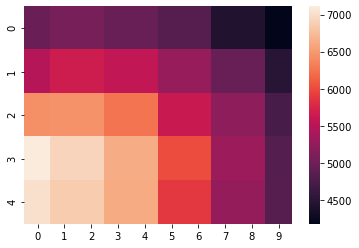

In [78]:
sns.heatmap(np.flip(phis[:,50].reshape(10,5),1).T)